In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \-O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()



--2020-05-08 18:33:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-05-08 18:33:30 (160 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [4]:
data

"FROM fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou, contracted to thine own bright eyes,\nFeed'st thy light'st flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.\nThou that art now the world's fresh ornament\nAnd only herald to the gaudy spring,\nWithin thine own bud buriest thy content\nAnd, tender churl, makest waste in niggarding.\nPity the world, or else this glutton be,\nTo eat the world's due, by the grave and thee.\nWhen forty winters shall beseige thy brow,\nAnd dig deep trenches in thy beauty's field,\nThy youth's proud livery, so gazed on now,\nWill be a tatter'd weed, of small worth held:\nThen being ask'd where all thy beauty lies,\nWhere all the treasure of thy lusty days,\nTo say, within thine own deep-sunken eyes,\nWere an all-eating shame and thriftless praise.\nHow much mor

In [7]:
corpus=data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(total_words)
print(tokenizer.word_index)


3211
{'and': 1, 'the': 2, 'to': 3, 'of': 4, 'my': 5, 'i': 6, 'in': 7, 'that': 8, 'thy': 9, 'thou': 10, 'with': 11, 'for': 12, 'is': 13, 'love': 14, 'not': 15, 'but': 16, 'a': 17, 'me': 18, 'thee': 19, 'so': 20, 'be': 21, 'as': 22, 'all': 23, 'you': 24, 'his': 25, 'which': 26, 'when': 27, 'it': 28, 'this': 29, 'by': 30, 'your': 31, 'doth': 32, 'do': 33, 'from': 34, 'on': 35, 'or': 36, 'no': 37, 'then': 38, 'have': 39, 'what': 40, 'are': 41, 'if': 42, 'more': 43, 'mine': 44, 'their': 45, 'shall': 46, 'sweet': 47, 'time': 48, 'will': 49, 'they': 50, 'beauty': 51, 'nor': 52, 'eyes': 53, 'art': 54, 'her': 55, 'heart': 56, 'yet': 57, 'o': 58, 'than': 59, 'can': 60, 'should': 61, 'thine': 62, 'now': 63, 'where': 64, 'make': 65, 'one': 66, 'hath': 67, 'he': 68, 'fair': 69, 'still': 70, 'how': 71, 'eye': 72, 'him': 73, 'like': 74, 'true': 75, 'see': 76, 'am': 77, 'she': 78, 'those': 79, 'though': 80, 'being': 81, 'some': 82, 'every': 83, 'such': 84, 'own': 85, 'were': 86, 'dost': 87, 'who': 88,

In [0]:
input_seq = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  #https://www.coursera.org/learn/natural-language-processing-tensorflow/discussions/weeks/4/threads/7EpRN1GnRLuKUTdRpzS7-Q  doubt solved
  #print(token_list)
  for i in range(1,len(token_list)):
    s=token_list[:i+1]
    input_seq.append(s)
#input_seq

max_sequence_len = max([len(x) for x in input_seq])
input_sequences = (pad_sequences(input_seq, maxlen=max_sequence_len))
#input_sequences

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)
#print(label[0][417])

In [24]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(120)))
model.add(Dense(total_words, activation="relu"))
model.add(Dense(total_words, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
dropout (Dropout)            (None, 10, 100)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 240)               212160    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              773851    
_________________________________________________________________
dense_2 (Dense)              (None, 3211)              10313732  
Total params: 11,620,843
Trainable params: 11,620,843
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 5s 11ms/step - loss: 6.8076 - accuracy: 0.0226
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.4011 - accuracy: 0.0347
Epoch 3/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0774 - accuracy: 0.0516
Epoch 4/100
484/484 [==============================] - 5s 10ms/step - loss: 5.6731 - accuracy: 0.0691
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 5.2567 - accuracy: 0.0853
Epoch 6/100
484/484 [==============================] - 5s 10ms/step - loss: 4.8253 - accuracy: 0.1057
Epoch 7/100
484/484 [==============================] - 5s 10ms/step - loss: 4.3076 - accuracy: 0.1420
Epoch 8/100
484/484 [==============================] - 5s 10ms/step - loss: 3.7073 - accuracy: 0.2060
Epoch 9/100
484/484 [==============================] - 5s 10ms/step - loss: 3.0794 - accuracy: 0.3076
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 2.532

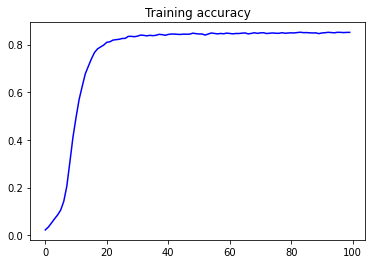

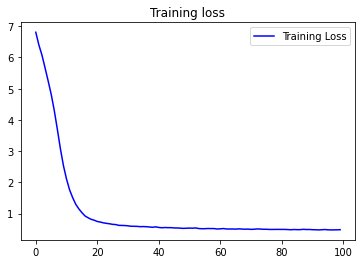

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [31]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope the world's fresh sight can speak of thee to be cross'd so live no such strife to thee i am not to thee that with thee in thee thence thy chief love more to live in thee i am of me untrue and with thee more torn room ' is
